<a href="https://colab.research.google.com/github/dilakuyucu7/DSA210-Fall24-Flashcards-Project/blob/main/EDA_on_all_languages_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this file is for comparing metrics among all 3 languages

Language Performance Statistics:
          Mean_Correct_Answers  Mean_Incorrect_Answers  \
Language                                                 
German                   11.33                    0.53   
Italian                   5.05                    0.76   
Korean                    6.57                    0.46   

          Average_Study_Frequency  
Language                           
German                      11.86  
Italian                      5.38  
Korean                       5.64  


<Figure size 1000x600 with 0 Axes>

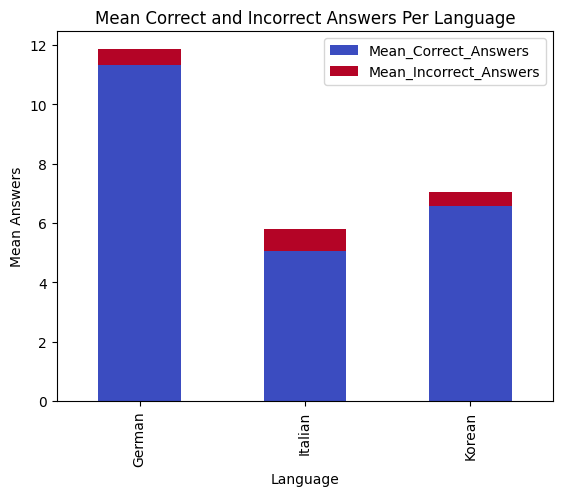

<ipython-input-2-4ce3ada79472>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_performance.index, y=language_performance['Average_Study_Frequency'], palette='viridis')


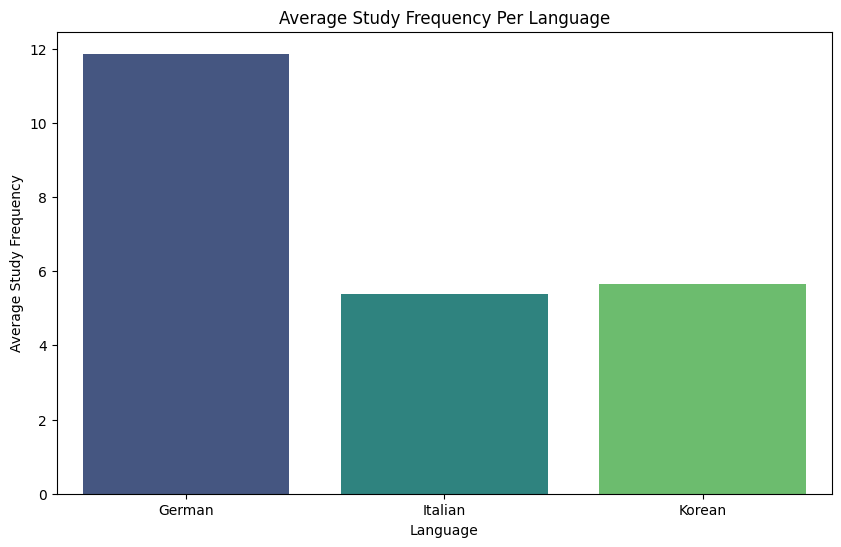

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (replace these with your actual file paths in Colab)
german_file = '/content/deu_progress_with_pos_stanza.csv'
korean_file = '/content/kr_progress_with_pos_stanza.csv'
italian_file = '/content/ita_progress_with_pos_stanza.csv'

# Load all three datasets
german_data = pd.read_csv(german_file)
korean_data = pd.read_csv(korean_file)
italian_data = pd.read_csv(italian_file)

# Adding a 'Language' column to each dataframe
german_data['Language'] = 'German'
korean_data['Language'] = 'Korean'
italian_data['Language'] = 'Italian'

# Combine all datasets into one
data = pd.concat([german_data, korean_data, italian_data])

# Convert columns to numeric
data['Correct answers'] = pd.to_numeric(data['Correct answers'], errors='coerce')
data['Incorrect answers'] = pd.to_numeric(data['Incorrect answers'], errors='coerce')
data['Studied'] = pd.to_numeric(data['Studied'], errors='coerce')

# Grouping data by language
language_performance = data.groupby('Language').agg(
    Mean_Correct_Answers=('Correct answers', 'mean'),
    Mean_Incorrect_Answers=('Incorrect answers', 'mean'),
    Average_Study_Frequency=('Studied', 'mean')
).round(2)

# Print language performance stats
print("Language Performance Statistics:")
print(language_performance)

# Visualize Mean Correct and Incorrect Answers
plt.figure(figsize=(10, 6))
language_performance[['Mean_Correct_Answers', 'Mean_Incorrect_Answers']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Mean Correct and Incorrect Answers Per Language')
plt.ylabel('Mean Answers')
plt.xlabel('Language')
plt.show()

# Visualize Average Study Frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=language_performance.index, y=language_performance['Average_Study_Frequency'], palette='viridis')
plt.title('Average Study Frequency Per Language')
plt.ylabel('Average Study Frequency')
plt.xlabel('Language')
plt.show()



Language-Wide Part of Speech Comparison Statistics:
                Mean_Accuracy_Rate  Total_Correct_Answers  \
Part of Speech                                              
ADJ                           0.85                  763.0   
ADP                           0.76                  118.0   
ADV                           0.80                  610.0   
AUX                           0.74                   17.0   
CCONJ                         0.75                   59.0   
DET                           0.78                  185.0   
INTJ                          0.83                   48.0   
NOUN                          0.88                 3716.0   
NUM                           1.00                   11.0   
PRON                          0.81                  203.0   
PROPN                         0.90                   23.0   
PUNCT                         0.75                    3.0   
SCONJ                         0.50                    3.0   
VERB                          0.8

<ipython-input-6-9c94cce14c15>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_comparison.index, y=pos_comparison['Mean_Accuracy_Rate'], palette='coolwarm')


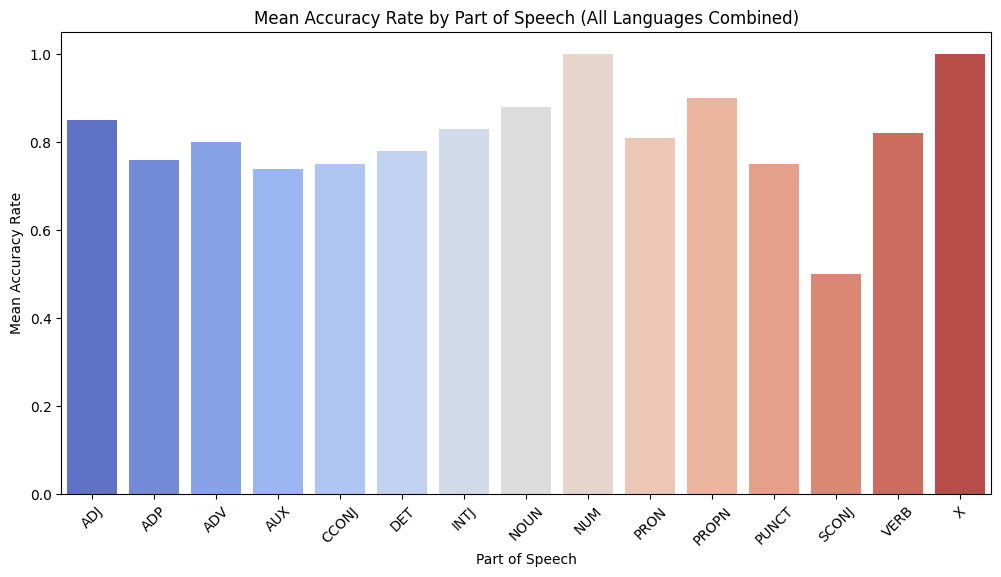

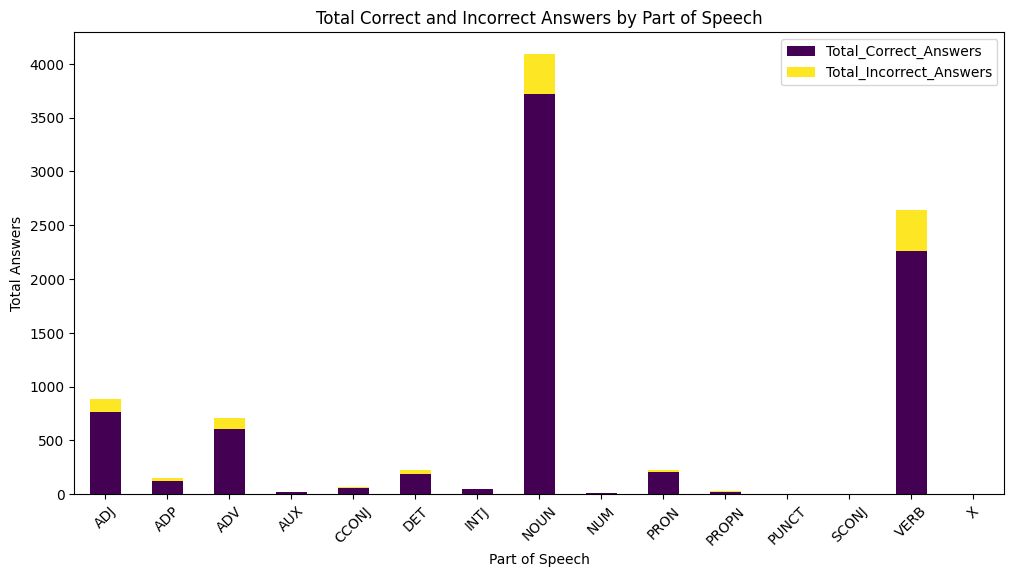

<ipython-input-6-9c94cce14c15>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_comparison.index, y=pos_comparison['Average_Study_Frequency'], palette='magma')


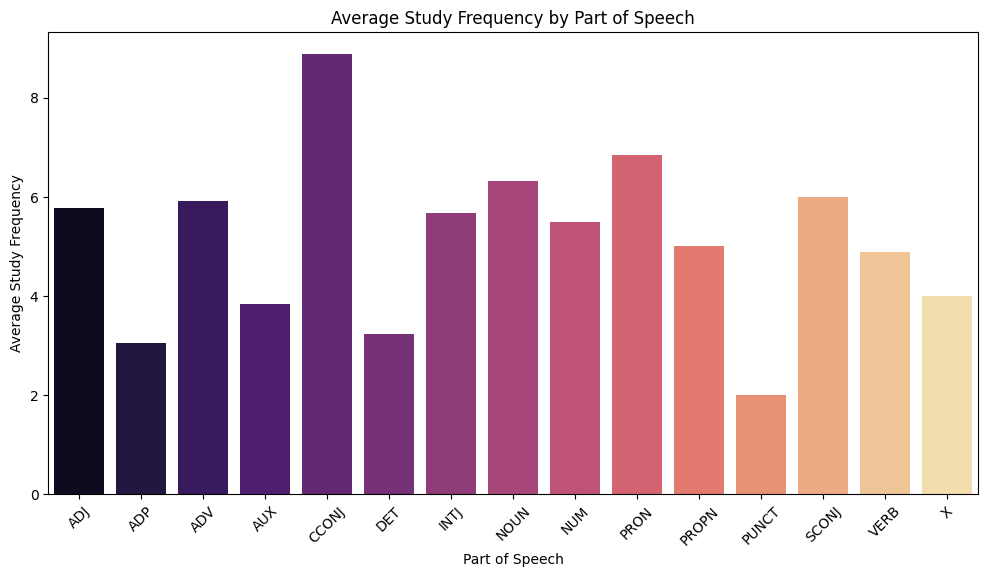

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (replace these with your actual file paths in Colab)
german_file = '/content/deu_progress_with_pos_stanza.csv'
korean_file = '/content/kr_progress_with_pos_stanza.csv'
italian_file = '/content/ita_progress_with_pos_stanza.csv'

# Load all three datasets
german_data = pd.read_csv(german_file)
korean_data = pd.read_csv(korean_file)
italian_data = pd.read_csv(italian_file)

# Correct the German dataset where 'DET' is misclassified as 'NOUN'
german_data['Part of Speech'] = german_data['Part of Speech'].replace('DET', 'NOUN')

# Adding a 'Language' column to each dataframe
german_data['Language'] = 'German'
korean_data['Language'] = 'Korean'
italian_data['Language'] = 'Italian'

# Combine all datasets into one
data = pd.concat([german_data, korean_data, italian_data])

# Convert columns to numeric
data['Correct answers'] = pd.to_numeric(data['Correct answers'], errors='coerce')
data['Incorrect answers'] = pd.to_numeric(data['Incorrect answers'], errors='coerce')
data['Studied'] = pd.to_numeric(data['Studied'], errors='coerce')

# Calculate accuracy rate
data['Accuracy Rate'] = data['Correct answers'] / (data['Correct answers'] + data['Incorrect answers'])

# Group data by part of speech across all languages
pos_comparison = data.groupby('Part of Speech').agg(
    Mean_Accuracy_Rate=('Accuracy Rate', 'mean'),
    Total_Correct_Answers=('Correct answers', 'sum'),
    Total_Incorrect_Answers=('Incorrect answers', 'sum'),
    Average_Study_Frequency=('Studied', 'mean')
).round(2)

# Print statistics
print("Language-Wide Part of Speech Comparison Statistics:")
print(pos_comparison)

# Visualize Mean Accuracy Rate by Part of Speech
plt.figure(figsize=(12, 6))
sns.barplot(x=pos_comparison.index, y=pos_comparison['Mean_Accuracy_Rate'], palette='coolwarm')
plt.title('Mean Accuracy Rate by Part of Speech (All Languages Combined)')
plt.ylabel('Mean Accuracy Rate')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Correct and Incorrect Answers by Part of Speech
pos_comparison[['Total_Correct_Answers', 'Total_Incorrect_Answers']].plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Total Correct and Incorrect Answers by Part of Speech')
plt.ylabel('Total Answers')
plt.xticks(rotation=45)
plt.show()

# Visualize Average Study Frequency by Part of Speech
plt.figure(figsize=(12, 6))
sns.barplot(x=pos_comparison.index, y=pos_comparison['Average_Study_Frequency'], palette='magma')
plt.title('Average Study Frequency by Part of Speech')
plt.ylabel('Average Study Frequency')
plt.xticks(rotation=45)
plt.show()


In [7]:
import pandas as pd

# File paths (replace these with your actual file paths in Colab)
german_file = '/content/deu_progress_with_pos_stanza.csv'
korean_file = '/content/kr_progress_with_pos_stanza.csv'
italian_file = '/content/ita_progress_with_pos_stanza.csv'

# Load all three datasets
german_data = pd.read_csv(german_file)
korean_data = pd.read_csv(korean_file)
italian_data = pd.read_csv(italian_file)

# Adding a 'Language' column to each dataframe
german_data['Language'] = 'German'
korean_data['Language'] = 'Korean'
italian_data['Language'] = 'Italian'

# Combine all datasets into one
data = pd.concat([german_data, korean_data, italian_data])

# Convert columns to numeric
data['Correct answers'] = pd.to_numeric(data['Correct answers'], errors='coerce')
data['Incorrect answers'] = pd.to_numeric(data['Incorrect answers'], errors='coerce')
data['Studied'] = pd.to_numeric(data['Studied'], errors='coerce')

# Calculate descriptive statistics for the entire dataset
descriptive_stats = data[['Correct answers', 'Incorrect answers', 'Studied']].describe().round(2)

# Print the descriptive statistics
print("General Descriptive Statistics Across All Languages:")
print(descriptive_stats)


General Descriptive Statistics Across All Languages:
       Correct answers  Incorrect answers  Studied
count          1513.00            1513.00  1648.00
mean              5.30               0.73     5.54
std               4.48               1.01     4.62
min               0.00               0.00     0.00
25%               1.00               0.00     2.00
50%               3.00               0.00     4.00
75%              10.00               1.00    10.00
max              20.00               6.00    20.00
